In [1]:
using DelimitedFiles, Plots, Statistics

In [2]:
path = "../../../test/epsilon-coupling/tmp_savedata/"

"../../../test/epsilon-coupling/tmp_savedata/"

In [3]:
namefile_energies = path * "../groundstate_PF00684_n60_mf_viterbi_ENERGIES.txt"
energies_mf = readdlm(namefile_energies);

In [4]:
namefile_param = path * "param_epsilon_coupling.txt"
param_epsilon = readdlm(namefile_param);
[param_epsilon[2,:]][1]

11-element Vector{Any}:
    "PF00684"
  67
 100
  50
   0.2
   0.001
   1.0e-10
    "random"
    "sce"
 300
    "0.1:0.1:0.4"

In [5]:
namefile_data = path * "data_epsilon_coupling.txt"
data_epsilon = readdlm(namefile_data);

In [6]:
indseqs = []
idx0s = []
ind = -1.0
for i in 1:size(data_epsilon, 1)
    indprev = ind
    ind = data_epsilon[i,1]
    idx0 = data_epsilon[i,2]
    if ind != indprev
        append!(indseqs, ind)
        append!(idx0s, idx0)
    end
end
indseqs = Int64.(indseqs)
idx0s = Int64.(idx0s)
[indseqs], [idx0s]

([[2, 3, 5, 6, 10, 12, 13, 24, 25]], [[2, 3, 5, 6, 10, 12, 13, 24, 25]])

In [7]:
epsilons = []
enext = 1.0
diff = -1.0
i = 0
while diff <0
    i += 1
    eprev = enext
    enext = data_epsilon[i,3]
    diff = enext - eprev
    append!(epsilons, enext)
    #@show eprev, enext, diff
end
epsilons = epsilons[1:end-1]
[epsilons]

1-element Vector{Vector{Any}}:
 [-0.0, -0.20000000298023224, -0.4000000059604645, -0.5, -0.6000000238418579, -0.699999988079071, -0.800000011920929, -0.8999999761581421, -1.0, -1.2000000476837158, -1.2999999523162842, -1.5]

In [8]:
neps = length(epsilons)
nsamp = length(indseqs)
neps, nsamp, 1:nsamp*neps

(12, 9, 1:108)

In [9]:
reshape(data_epsilon[1:nsamp*neps,3], neps, nsamp)

12×9 Matrix{Float64}:
 -0.0  -0.0  -0.0  -0.0  -0.0  -0.0  -0.0  -0.0  -0.0
 -0.2  -0.2  -0.2  -0.2  -0.2  -0.2  -0.2  -0.2  -0.2
 -0.4  -0.4  -0.4  -0.4  -0.4  -0.4  -0.4  -0.4  -0.4
 -0.5  -0.5  -0.5  -0.5  -0.5  -0.5  -0.5  -0.5  -0.5
 -0.6  -0.6  -0.6  -0.6  -0.6  -0.6  -0.6  -0.6  -0.6
 -0.7  -0.7  -0.7  -0.7  -0.7  -0.7  -0.7  -0.7  -0.7
 -0.8  -0.8  -0.8  -0.8  -0.8  -0.8  -0.8  -0.8  -0.8
 -0.9  -0.9  -0.9  -0.9  -0.9  -0.9  -0.9  -0.9  -0.9
 -1.0  -1.0  -1.0  -1.0  -1.0  -1.0  -1.0  -1.0  -1.0
 -1.2  -1.2  -1.2  -1.2  -1.2  -1.2  -1.2  -1.2  -1.2
 -1.3  -1.3  -1.3  -1.3  -1.3  -1.3  -1.3  -1.3  -1.3
 -1.5  -1.5  -1.5  -1.5  -1.5  -1.5  -1.5  -1.5  -1.5

In [10]:
Hdists = reshape(data_epsilon[1:nsamp*neps,4], neps, nsamp);
emins = reshape(data_epsilon[1:nsamp*neps,5], neps, nsamp)
Us = reshape(data_epsilon[1:nsamp*neps,6], neps, nsamp)
Ss = reshape(data_epsilon[1:nsamp*neps,7], neps, nsamp)
polars = reshape(data_epsilon[1:nsamp*neps,8], neps, nsamp)
betas = reshape(data_epsilon[1:nsamp*neps,9], neps, nsamp)
errs = reshape(data_epsilon[1:nsamp*neps,10], neps, nsamp)
checks = reshape(data_epsilon[1:nsamp*neps,11], neps, nsamp);

In [11]:
checks

12×9 Matrix{Float64}:
 0.0  0.0  0.0  2.0  1.0  0.0  0.0  2.0   1.0
 4.0  0.0  0.0  2.0  2.0  0.0  0.0  3.0   3.0
 4.0  0.0  2.0  3.0  2.0  0.0  6.0  4.0   1.0
 4.0  3.0  3.0  2.0  2.0  0.0  3.0  5.0   3.0
 4.0  2.0  5.0  2.0  3.0  0.0  3.0  3.0   4.0
 5.0  3.0  3.0  1.0  4.0  0.0  3.0  6.0   5.0
 5.0  6.0  4.0  1.0  5.0  0.0  3.0  9.0   4.0
 7.0  5.0  6.0  4.0  3.0  4.0  6.0  5.0  10.0
 6.0  7.0  6.0  3.0  7.0  6.0  7.0  7.0  12.0
 8.0  3.0  7.0  6.0  7.0  6.0  9.0  8.0  10.0
 8.0  3.0  7.0  6.0  7.0  6.0  9.0  8.0  10.0
 8.0  3.0  7.0  6.0  8.0  6.0  9.0  8.0  10.0

In [12]:
mask = (checks .== 0.0)
nbsol_mean = [mean(mask[j,:]) for j in eachindex(epsilons)]
nbsol_std = [std(mask[j,:]) for j in eachindex(epsilons)]./sqrt(nsamp);
nbsol_mean

12-element Vector{Float64}:
 0.5555555555555556
 0.4444444444444444
 0.2222222222222222
 0.1111111111111111
 0.1111111111111111
 0.1111111111111111
 0.1111111111111111
 0.0
 0.0
 0.0
 0.0
 0.0

In [20]:
Hdists[1,:]

9-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [36]:
emins[1,8]

-129.05227661132812

In [37]:
energies_mf[24]

-124.01706

In [15]:
emins[1,:] .- energies_mf[indseqs]

9-element Vector{Float64}:
 -3.857421887687451e-6
  1.8603515741233423e-6
  4.858398426677013e-6
 -2.5341796856537258e-6
  3.1347656204161467e-6
  3.3691406997604645e-7
  1.6259765516224434e-6
 -5.035216611328124
  1.8945312518781066e-6

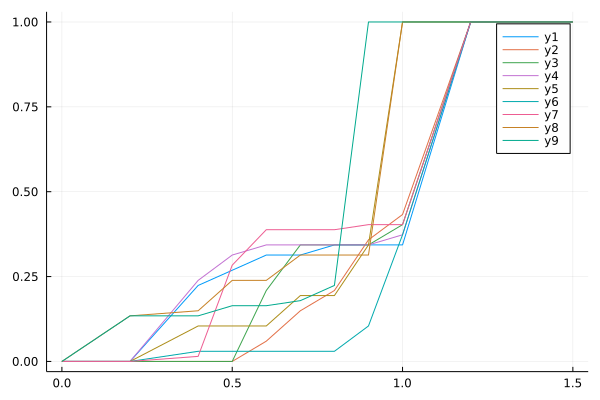

In [18]:
X = Hdists
p = plot(-epsilons,X[:,1])
for i in 2:length(indseqs)
    plot!(p, -epsilons,X[:,i])
end
p

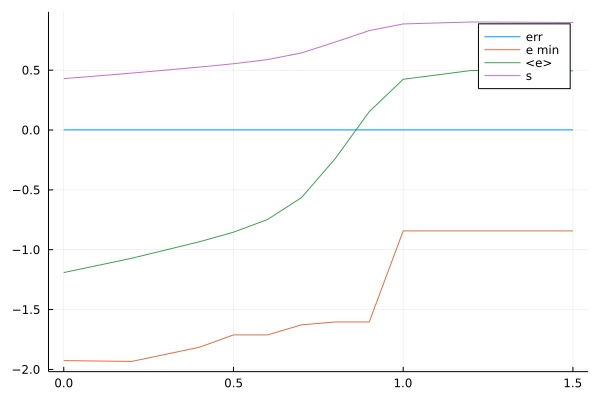

In [17]:
L=67
i=8
plot(-epsilons, errs[:,i], label="err")
plot!(-epsilons, emins[:,i]./L, label="e min")
plot!(-epsilons, Us[:,i]./L, label="<e>")
plot!(-epsilons, Ss[:,i], label="s")

In [21]:
mΔEs = []
vΔEs = []
mΔUs = []
vΔUs = []
mΔdist = []
vΔdist = []
for j in eachindex(epsilons)
    ΔE = []
    ΔU = []
    Δi = []
    for i in 1:length(indseqs)
        dE = (emins[j,i] - emins[1,i])
        append!(ΔE, dE)
        dU = (Us[j,i] - Us[1,i])
        append!(ΔU, dU)
        di = Hdists[j,i]
        append!(Δi, di)
    end
    append!(mΔEs, mean(ΔE))
    append!(vΔEs, std(ΔE)/sqrt(nsamp))
    append!(mΔUs, mean(ΔU))
    append!(vΔUs, std(ΔU)/sqrt(nsamp))
    append!(mΔdist, mean(Δi))
    append!(vΔdist, std(Δi)/sqrt(nsamp))
end

In [22]:
nsamp

9

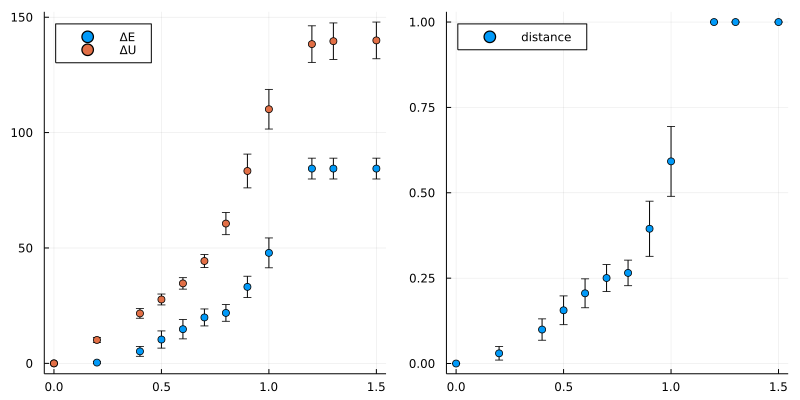

In [23]:
pΔ = scatter(-epsilons, mΔEs, yerr=vΔEs, label="ΔE", legend=:topleft)
scatter!(-epsilons, mΔUs, yerr=vΔUs, label="ΔU")
pdist = scatter(-epsilons, mΔdist, yerr=vΔdist, label="distance", legend=:topleft)
plot(pΔ, pdist, size=(800,400))

In [24]:
mE = []
vE = []
mU = []
vU = []
mS = []
vS = []
for j in eachindex(epsilons)
    EE = []
    UU = []
    SS = []
    for i in 1:length(indseqs)
        append!(EE, emins[j,i])
        append!(UU, Us[j,i])
        append!(SS, Ss[j,i])
    end
    append!(mE, mean(EE))
    append!(vE, std(EE)/sqrt(nsamp))
    append!(mU, mean(UU))
    append!(vU, std(UU)/sqrt(nsamp))
    append!(mS, mean(SS))
    append!(vS, std(SS)/sqrt(nsamp))
end

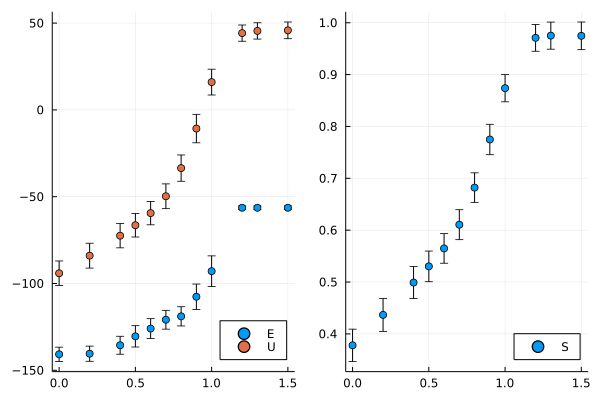

In [25]:
pu = scatter(-epsilons, mE, yerr=vE, label="E", legend=:bottomright)
scatter!(-epsilons, mU, yerr=vU, label="U", legend=:bottomright)
ps = scatter(-epsilons, mS, yerr=vS, label="S", legend=:bottomright)
plot(pu, ps)

In [26]:
μbetas = [mean(betas[j,:]) for j in eachindex(epsilons)]
σbetas = [std(betas[j,:]) for j in eachindex(epsilons)]./sqrt(nsamp)
μerrs = [mean(errs[j,:]) for j in eachindex(epsilons)]
σerrs = [std(errs[j,:]) for j in eachindex(epsilons)]./sqrt(nsamp);

In [27]:
mpolars = []
vpolars = []
for j in eachindex(epsilons)
    pols = []
    for i in 1:length(indseqs)
        append!(pols, polars[j,i])
    end
    append!(mpolars, mean(pols))
    append!(vpolars, std(pols)/sqrt(nsamp))
end

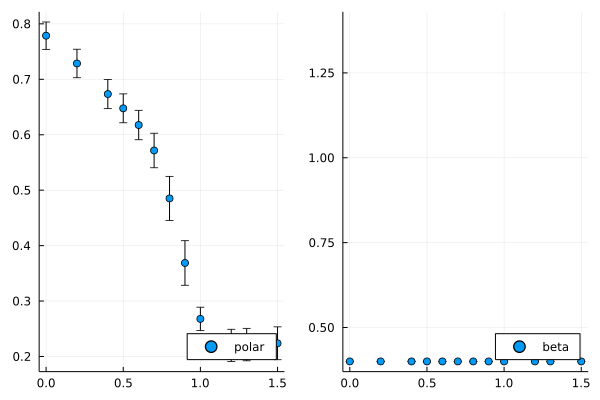

In [28]:
pp = scatter(-epsilons, mpolars, yerr=vpolars, label="polar", legend=:bottomright)
pb = scatter(-epsilons, μbetas, yerr=σbetas, label="beta", legend=:bottomright)
plot(pp, pb)

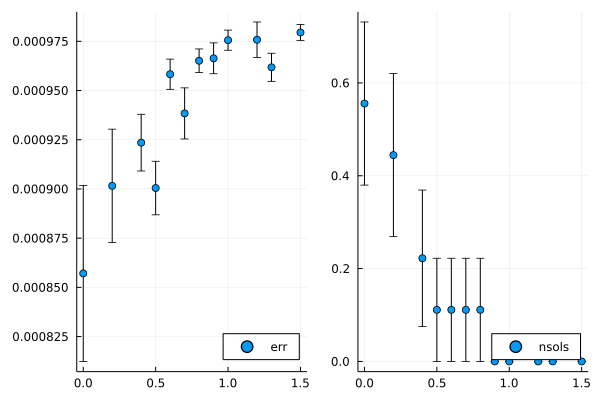

In [29]:
pe = scatter(-epsilons, μerrs, yerr=σerrs, label="err", legend=:bottomright)
pnunsat = scatter(-epsilons, nbsol_mean, yerr=nbsol_std, label="nsols", legend=:bottomright)
plot(pe, pnunsat)

In [30]:
namefile = "run_epsilon_PF00684_sce_"*string(nsamp)*"_betafixed.txt"


"run_epsilon_PF00684_sce_9_betafixed.txt"

In [32]:
paramrun = [param_epsilon[2,:]][1]
paramrun = vcat(nsamp, paramrun)

12-element Vector{Any}:
   9
    "PF00684"
  67
 100
  50
   0.2
   0.001
   1.0e-10
    "random"
    "sce"
 300
    "0.1:0.1:0.4"

In [33]:
open(namefile, "a") do io
    writedlm(io, [paramrun])
end


In [34]:

open(namefile, "a") do io
    writedlm(io, [epsilons])

    writedlm(io, [mΔEs])
    writedlm(io, [vΔEs])
    writedlm(io, [mΔUs])
    writedlm(io, [vΔUs])
    writedlm(io, [mΔdist])
    writedlm(io, [vΔdist])
    
    writedlm(io, [mE])
    writedlm(io, [vE])
    writedlm(io, [mU])
    writedlm(io, [vU])
    writedlm(io, [mS])
    writedlm(io, [vS])
    
    writedlm(io, [mpolars])
    writedlm(io, [vpolars])
    writedlm(io, [μbetas])
    writedlm(io, [σbetas])
    writedlm(io, [μerrs])
    writedlm(io, [σerrs])

    writedlm(io, [nbsol_mean])
    writedlm(io, [nbsol_std])
end
